In [1]:
#in_rds = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/annotation/gff_A2_black/mergedSamples/allSamples.integrated.rds" 
se_f = "/data/Mito_Trace/output/aggregate/CHIP_aggr/data/annotation/gff_A2/mergedSamples/allSamples.integrated.rds"
#labels_meta = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
outdir = "/data/Mito_Trace/output/aggregate/CHIP_aggr/data/annotation/gff_A2/mergedSamples/pseudotime"
order_f = ""
to_de = FALSE
#"/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/annotation/gff_A2_black/mergedSamples/" 

In [2]:
#labels.meta <- read.table(labels_meta, sep="\t")

In [3]:
# BiocManager::install("Rsamtools")
# install.packages("Signac")
#library(BiocManager)
## have to do this because the remotes package has stupid defaults
## and will error on something as trivial as a binary package being built on a slightly different R version
#Sys.setenv(R_REMOTES_NO_ERRORS_FROM_WARNINGS = "true")
#BiocManager::install("cole-trapnell-lab/monocle3")
#install.packages('R.utils')
#remotes::install_github('satijalab/seurat-wrappers')

library(monocle3)
library(Signac)
library(Seurat)
library(SeuratWrappers)
library(Matrix)
library(ggplot2)
library(patchwork)
set.seed(1234)

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading requir

In [4]:
se <- readRDS(se_f)
#se <- AddMetaData(se, labels.meta["cluster_labels"])


In [5]:
se

An object of class Seurat 
247232 features across 47542 samples within 2 assays 
Active assay: RNA (19575 features, 0 variable features)
 1 other assay present: ATAC
 2 dimensional reductions calculated: integrated_lsi, umap

In [6]:
DefaultAssay(se) <- "ATAC"


In [7]:
# Seurat_Object_Diet <- DietSeurat(seurat_object, graphs = "pca")
# SCE <- as.SingleCellExperiment(Seurat_Object_Diet)

In [8]:
se.cds <- as.cell_data_set(se)
se.cds <- cluster_cells(cds = se.cds, reduction_method = "UMAP")
se.cds <- learn_graph(se.cds, use_partition = TRUE)


Warning message:
“Monocle 3 trajectories require cluster partitions, which Seurat does not calculate. Please run 'cluster_cells' on your cell_data_set object”


  |======================================================================| 100%


Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”


  |======================================================================| 100%


Warning message in igraph::graph.dfs(stree_ori, root = root_cell, neimode = "all", :
“Argument `neimode' is deprecated; use `mode' instead”


Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


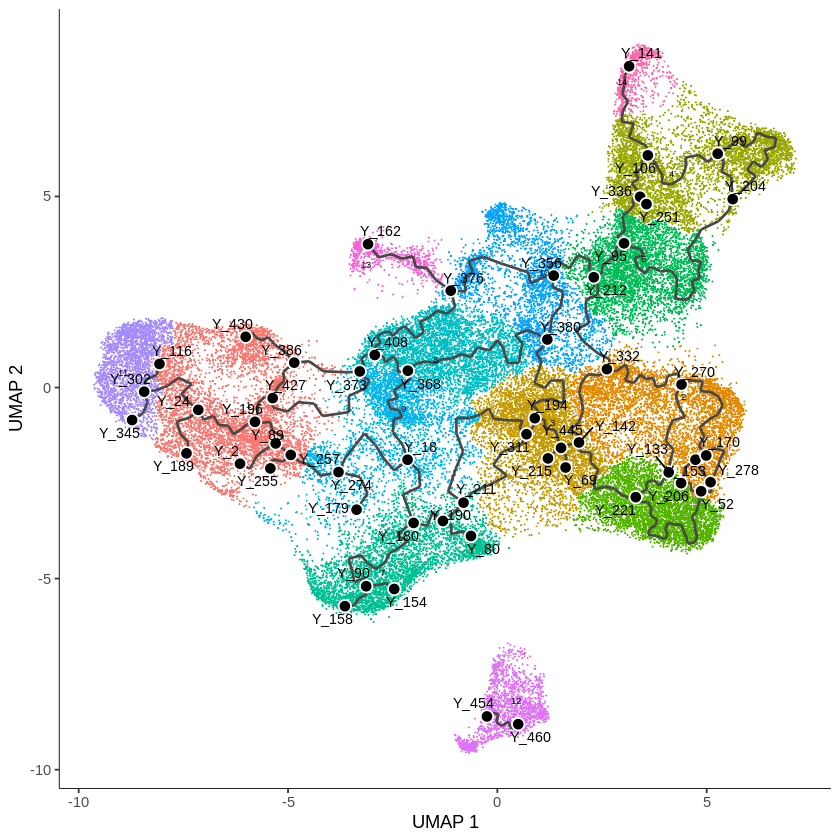

In [9]:
# plot trajectories colored by pseudotime
plot_cells(
  cds = se.cds,
  show_trajectory_graph = TRUE, label_principal_points = TRUE
)

In [14]:
outdir

[1] "/data/Mito_Trace/output/aggregate/CHIP_aggr/data/annotation/gff_A2/mergedSamples/pseudotime"

## Use the middle as the start


Cells aren't colored in a way that allows them to be grouped.

Saving 6.67 x 6.67 in image



orig.ident nCount_ATAC nFeature_ATAC
cd34norm1_Control_AAACGAAAGAGGTCCA-1 Control    1507        1507         
cd34norm1_Control_AAACGAAAGCGATACG-1 Control    4003        4003         
cd34norm1_Control_AAACGAAAGTCGTGAG-1 Control    1199        1199         
cd34norm1_Control_AAACGAACAATAGTGA-1 Control    2950        2950         
cd34norm1_Control_AAACGAACACAATAAG-1 Control    1398        1398         
cd34norm1_Control_AAACGAACACTGATAC-1 Control    1110        1110         
cd34norm1_Control_AAACGAACAGTAACCT-1 Control     815         815         
cd34norm1_Control_AAACGAACATCGTGAT-1 Control    7591        7591         
cd34norm1_Control_AAACGAAGTAACGGTG-1 Control    1232        1232         
cd34norm1_Control_AAACGAAGTAAGTCTC-1 Control    1451        1451         
cd34norm1_Control_AAACGAAGTACCAAGG-1 Control    4417        4417         
cd34norm1_Control_AAACGAAGTCCCGTGA-1 Control    5177        5177         
cd34norm1_Control_AAACGAAGTGGATTCT-1 Control     901         901         
cd34norm1_Control_AAACGAATCGAGCGCT-1 Control    2135        2135         
cd34norm1_Control_AAACGAATCGCAACTA-1 Control    7083        7083         
cd34norm1_Control_AAACGAATCGCGCTGA-1 Control     699         699         
cd34norm1_Control_AAACTCGAGATTACGA-1 Control    1991        1991         
cd34norm1_Control_AAACTCGCAAGACTTC-1 Control     503         503         
cd34norm1_Control_AAACTCGCACCTCGTT-1 Control    3947        3947         
cd34norm1_Control_AAACTCGCACTTGCGG-1 Control     745         745         
cd34norm1_Control_AAACTCGCATCGCCTT-1 Control    1815        1815         
cd34norm1_Control_AAACTCGCATGTGGGA-1 Control    3879        3879         
cd34norm1_Control_AAACTCGGTATCCTTT-1 Control    3231        3231         
cd34norm1_Control_AAACTCGGTGCCCTAG-1 Control    3857        3857         
cd34norm1_Control_AAACTCGGTGTAGGAC-1 Control     592         592         
cd34norm1_Control_AAACTCGTCACTAGCA-1 Control    1856        1856         
cd34norm1_Control_AAACTCGTCGAGTGTT-1 Control    3339        3339         
cd34norm1_Control_AAACTCGTCTATCCTA-1 Control    2473        2473         
cd34norm1_Control_AAACTGCAGCATGTGG-1 Control    4005        4005         
cd34norm1_Control_AAACTGCAGGGACGTT-1 Control     836         836         
⋮                                    ⋮          ⋮           ⋮            
CHIP_b2_Input_TTTGGCCAGTAACACA-1     Input      1312        1312         
CHIP_b2_Input_TTTGGCCAGTCTCGAT-1     Input      5372        5372         
CHIP_b2_Input_TTTGGCCCAAAGAGAG-1     Input      7686        7686         
CHIP_b2_Input_TTTGGCCCAGGTAACG-1     Input       859         859         
CHIP_b2_Input_TTTGGCCCAGGTCCTG-1     Input      1352        1352         
CHIP_b2_Input_TTTGGCCCATTCACCC-1     Input      3573        3573         
CHIP_b2_Input_TTTGGCCGTACTATGC-1     Input       264         264         
CHIP_b2_Input_TTTGGCCGTATCTGCA-1     Input      6003        6003         
CHIP_b2_Input_TTTGGCCGTTACCACA-1     Input      5745        5745         
CHIP_b2_Input_TTTGGCCTCGGACGAA-1     Input      1715        1715         
CHIP_b2_Input_TTTGGTTAGATCGATA-1     Input       450         450         
CHIP_b2_Input_TTTGGTTAGTTCCCGG-1     Input      2875        2875         
CHIP_b2_Input_TTTGGTTCACGGTTAT-1     Input      1260        1260         
CHIP_b2_Input_TTTGGTTGTACTTCAG-1     Input       378         378         
CHIP_b2_Input_TTTGGTTGTCAGGCTC-1     Input      2943        2943         
CHIP_b2_Input_TTTGGTTGTTCCCGGA-1     Input      2132        2132         
CHIP_b2_Input_TTTGGTTGTTCTTTGT-1     Input       248         248         
CHIP_b2_Input_TTTGGTTTCAATTGGC-1     Input      2184        2184         
CHIP_b2_Input_TTTGGTTTCGGCAATT-1     Input      1296        1296         
CHIP_b2_Input_TTTGTGTAGACTAGCG-1     Input      1365        1365         
CHIP_b2_Input_TTTGTGTAGATTCCGT-1     Input      1487        1487         
CHIP_b2_Input_TTTGTGTAGGATTGAT-1     Input      1807        1807         
CHIP_b2_Input_TTTGTGTCAAGGTTCT-1     Inpu

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



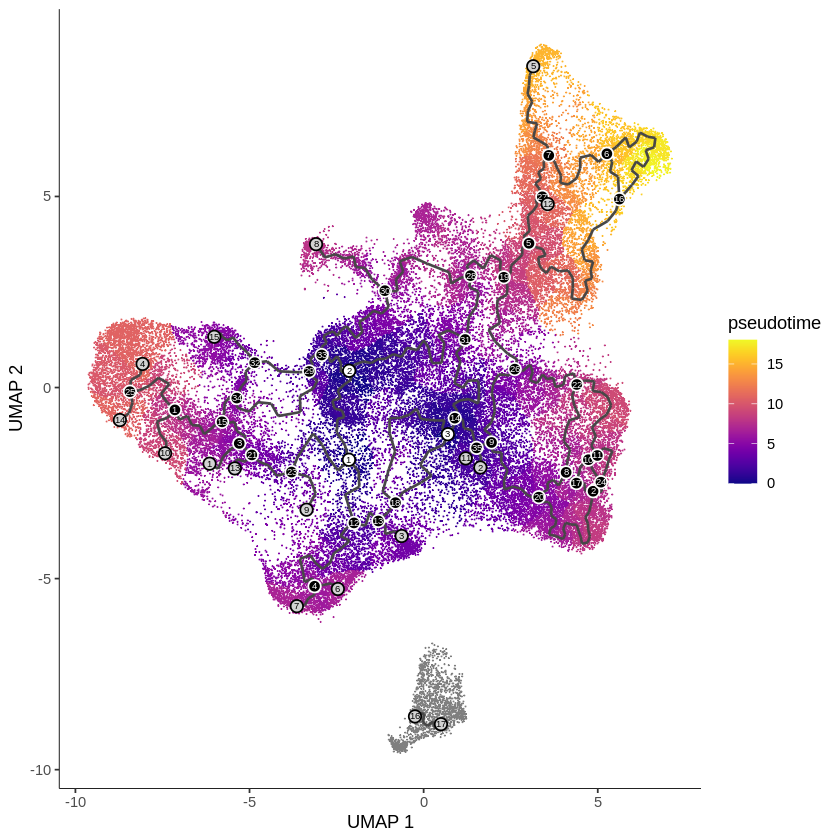

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



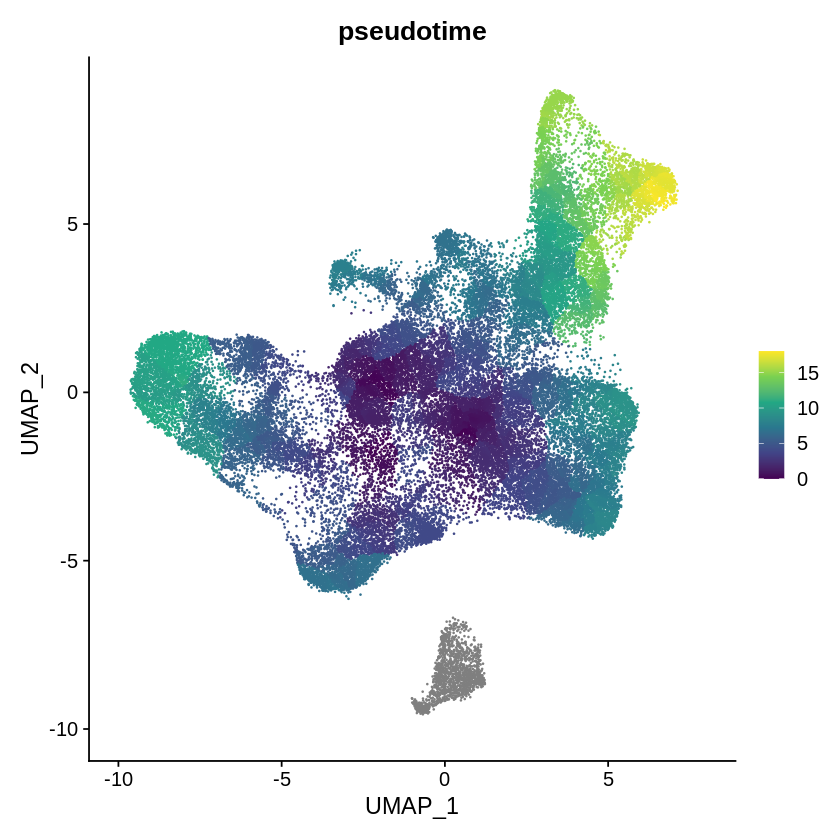

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



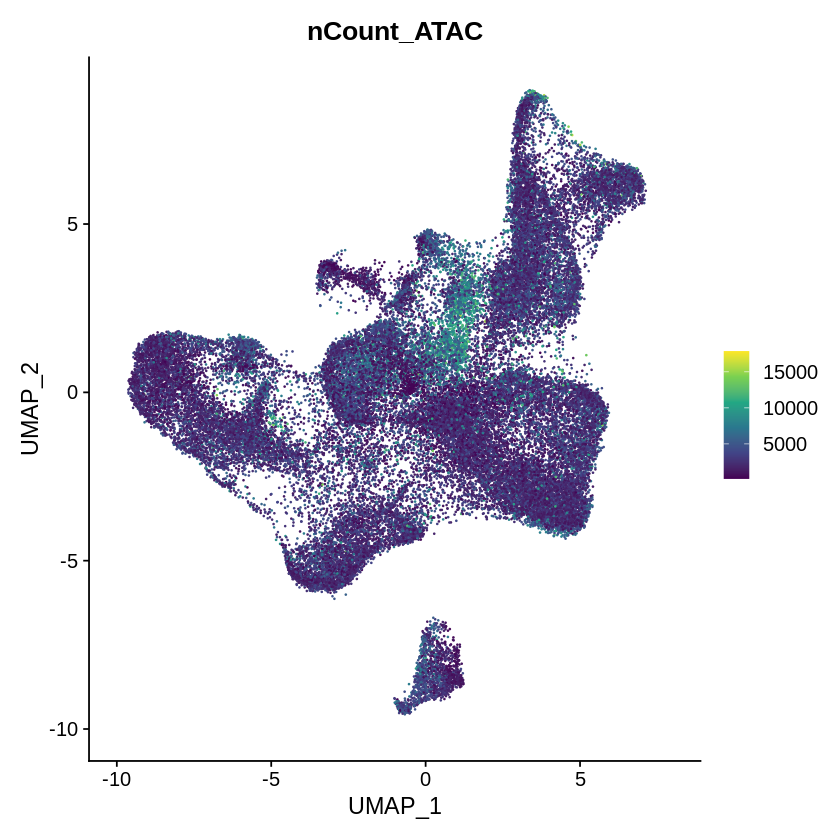

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



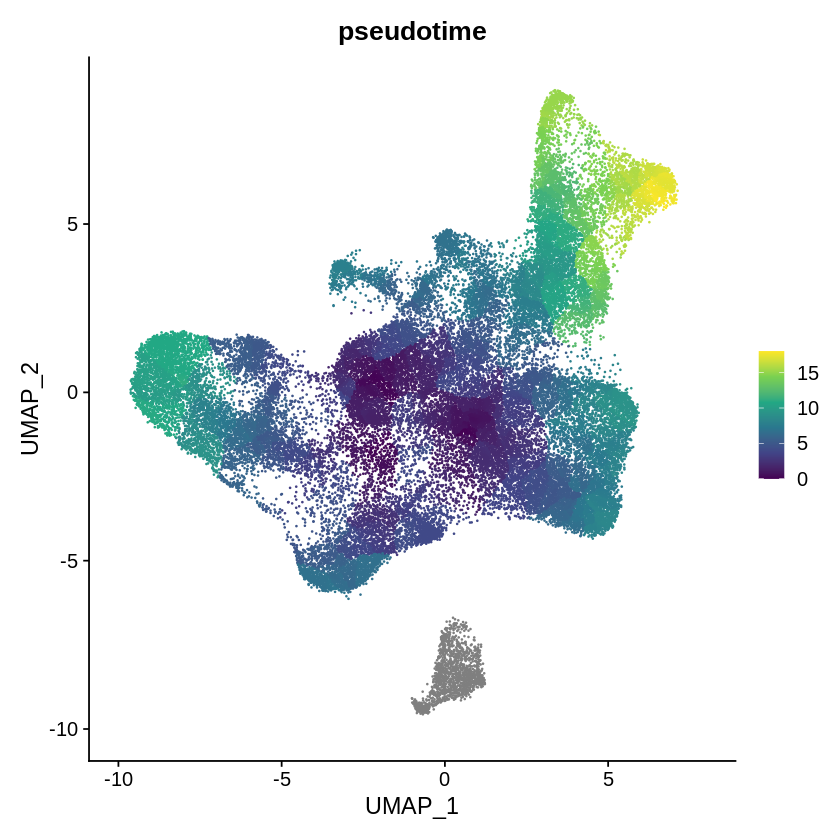

Saving 6.67 x 6.67 in image



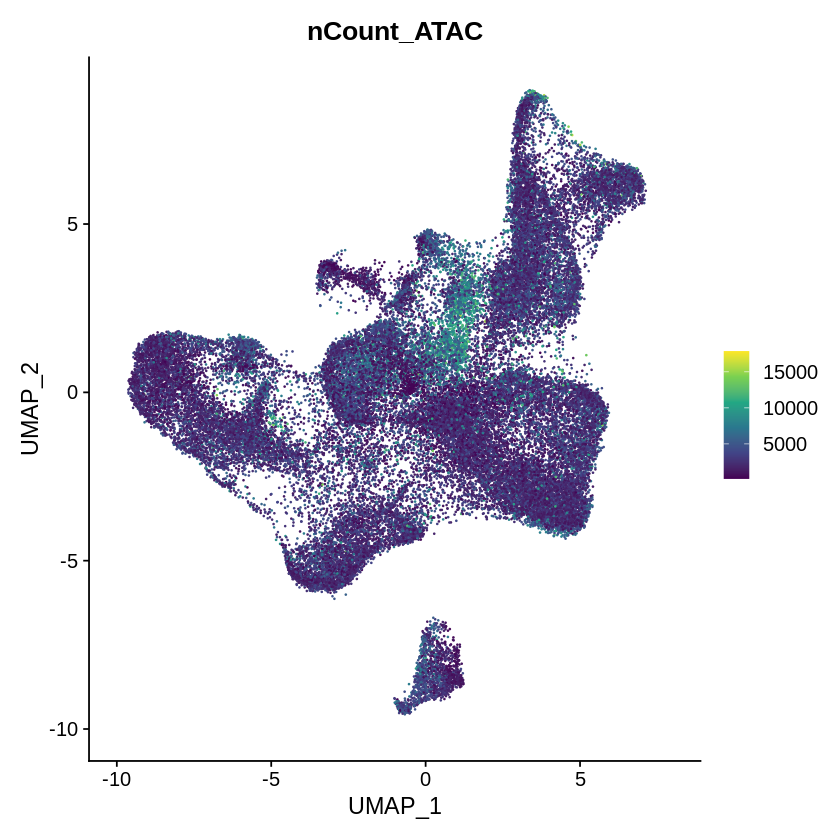

In [15]:

# order cells
# interactive more or not
if (order_f == ""){
   se.cds <- order_cells(se.cds, reduction_method = "UMAP", root_pr_nodes = c('Y_18','Y_368',
                                                                              'Y_311')) 
}else{
    se.cds <- order_cells(se.cds, reduction_method = "UMAP", root_cells = hsc)
}

# plot trajectories colored by pseudotime
plot_cells(
  cds = se.cds,
  color_cells_by = "pseudotime",
  show_trajectory_graph = TRUE
)
ggsave(file.path(outdir, "SE.pseudotime.trajectory.png"))


se <- AddMetaData(
  object = se,
  metadata = se.cds@principal_graph_aux@listData$UMAP$pseudotime,
  col.name = "pseudotime"
)


FeaturePlot(se, c("pseudotime"), pt.size = 0.1) & scale_color_viridis_c()
ggsave(file.path(outdir, "SE.pseudotime.png"))
FeaturePlot(se, c("nCount_ATAC"), pt.size = 0.1) & scale_color_viridis_c()
ggsave(file.path(outdir, "SE.pseudotime.nCountPeaks.png"))


FeaturePlot(se, c("pseudotime"), pt.size = 0.1) & scale_color_viridis_c()
ggsave(file.path(outdir, "SE.pseudotime.png"))
FeaturePlot(se, c("nCount_ATAC"), pt.size = 0.1) & scale_color_viridis_c()
ggsave(file.path(outdir, "SE.pseudotime.nCountPeaks.png"))




## Use the bottom as the start

Cells aren't colored in a way that allows them to be grouped.

Saving 6.67 x 6.67 in image



orig.ident nCount_ATAC nFeature_ATAC
cd34norm1_Control_AAACGAAAGAGGTCCA-1 Control    1507        1507         
cd34norm1_Control_AAACGAAAGCGATACG-1 Control    4003        4003         
cd34norm1_Control_AAACGAAAGTCGTGAG-1 Control    1199        1199         
cd34norm1_Control_AAACGAACAATAGTGA-1 Control    2950        2950         
cd34norm1_Control_AAACGAACACAATAAG-1 Control    1398        1398         
cd34norm1_Control_AAACGAACACTGATAC-1 Control    1110        1110         
cd34norm1_Control_AAACGAACAGTAACCT-1 Control     815         815         
cd34norm1_Control_AAACGAACATCGTGAT-1 Control    7591        7591         
cd34norm1_Control_AAACGAAGTAACGGTG-1 Control    1232        1232         
cd34norm1_Control_AAACGAAGTAAGTCTC-1 Control    1451        1451         
cd34norm1_Control_AAACGAAGTACCAAGG-1 Control    4417        4417         
cd34norm1_Control_AAACGAAGTCCCGTGA-1 Control    5177        5177         
cd34norm1_Control_AAACGAAGTGGATTCT-1 Control     901         901         
cd34norm1_Control_AAACGAATCGAGCGCT-1 Control    2135        2135         
cd34norm1_Control_AAACGAATCGCAACTA-1 Control    7083        7083         
cd34norm1_Control_AAACGAATCGCGCTGA-1 Control     699         699         
cd34norm1_Control_AAACTCGAGATTACGA-1 Control    1991        1991         
cd34norm1_Control_AAACTCGCAAGACTTC-1 Control     503         503         
cd34norm1_Control_AAACTCGCACCTCGTT-1 Control    3947        3947         
cd34norm1_Control_AAACTCGCACTTGCGG-1 Control     745         745         
cd34norm1_Control_AAACTCGCATCGCCTT-1 Control    1815        1815         
cd34norm1_Control_AAACTCGCATGTGGGA-1 Control    3879        3879         
cd34norm1_Control_AAACTCGGTATCCTTT-1 Control    3231        3231         
cd34norm1_Control_AAACTCGGTGCCCTAG-1 Control    3857        3857         
cd34norm1_Control_AAACTCGGTGTAGGAC-1 Control     592         592         
cd34norm1_Control_AAACTCGTCACTAGCA-1 Control    1856        1856         
cd34norm1_Control_AAACTCGTCGAGTGTT-1 Control    3339        3339         
cd34norm1_Control_AAACTCGTCTATCCTA-1 Control    2473        2473         
cd34norm1_Control_AAACTGCAGCATGTGG-1 Control    4005        4005         
cd34norm1_Control_AAACTGCAGGGACGTT-1 Control     836         836         
⋮                                    ⋮          ⋮           ⋮            
CHIP_b2_Input_TTTGGCCAGTAACACA-1     Input      1312        1312         
CHIP_b2_Input_TTTGGCCAGTCTCGAT-1     Input      5372        5372         
CHIP_b2_Input_TTTGGCCCAAAGAGAG-1     Input      7686        7686         
CHIP_b2_Input_TTTGGCCCAGGTAACG-1     Input       859         859         
CHIP_b2_Input_TTTGGCCCAGGTCCTG-1     Input      1352        1352         
CHIP_b2_Input_TTTGGCCCATTCACCC-1     Input      3573        3573         
CHIP_b2_Input_TTTGGCCGTACTATGC-1     Input       264         264         
CHIP_b2_Input_TTTGGCCGTATCTGCA-1     Input      6003        6003         
CHIP_b2_Input_TTTGGCCGTTACCACA-1     Input      5745        5745         
CHIP_b2_Input_TTTGGCCTCGGACGAA-1     Input      1715        1715         
CHIP_b2_Input_TTTGGTTAGATCGATA-1     Input       450         450         
CHIP_b2_Input_TTTGGTTAGTTCCCGG-1     Input      2875        2875         
CHIP_b2_Input_TTTGGTTCACGGTTAT-1     Input      1260        1260         
CHIP_b2_Input_TTTGGTTGTACTTCAG-1     Input       378         378         
CHIP_b2_Input_TTTGGTTGTCAGGCTC-1     Input      2943        2943         
CHIP_b2_Input_TTTGGTTGTTCCCGGA-1     Input      2132        2132         
CHIP_b2_Input_TTTGGTTGTTCTTTGT-1     Input       248         248         
CHIP_b2_Input_TTTGGTTTCAATTGGC-1     Input      2184        2184         
CHIP_b2_Input_TTTGGTTTCGGCAATT-1     Input      1296        1296         
CHIP_b2_Input_TTTGTGTAGACTAGCG-1     Input      1365        1365         
CHIP_b2_Input_TTTGTGTAGATTCCGT-1     Input      1487        1487         
CHIP_b2_Input_TTTGTGTAGGATTGAT-1     Input      1807        1807         
CHIP_b2_Input_TTTGTGTCAAGGTTCT-1     Inpu

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



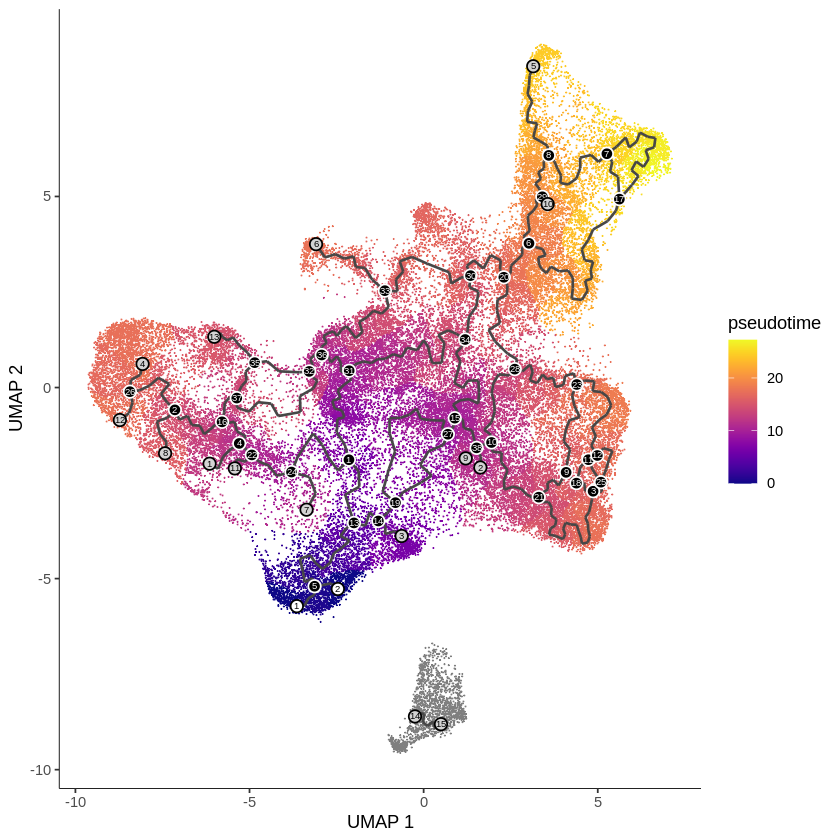

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



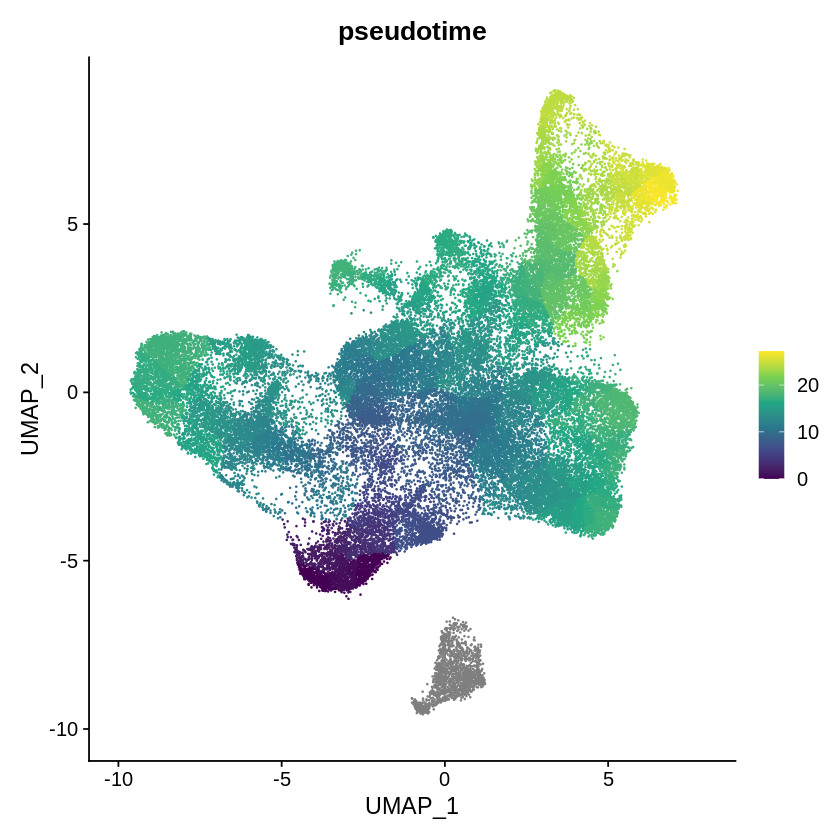

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



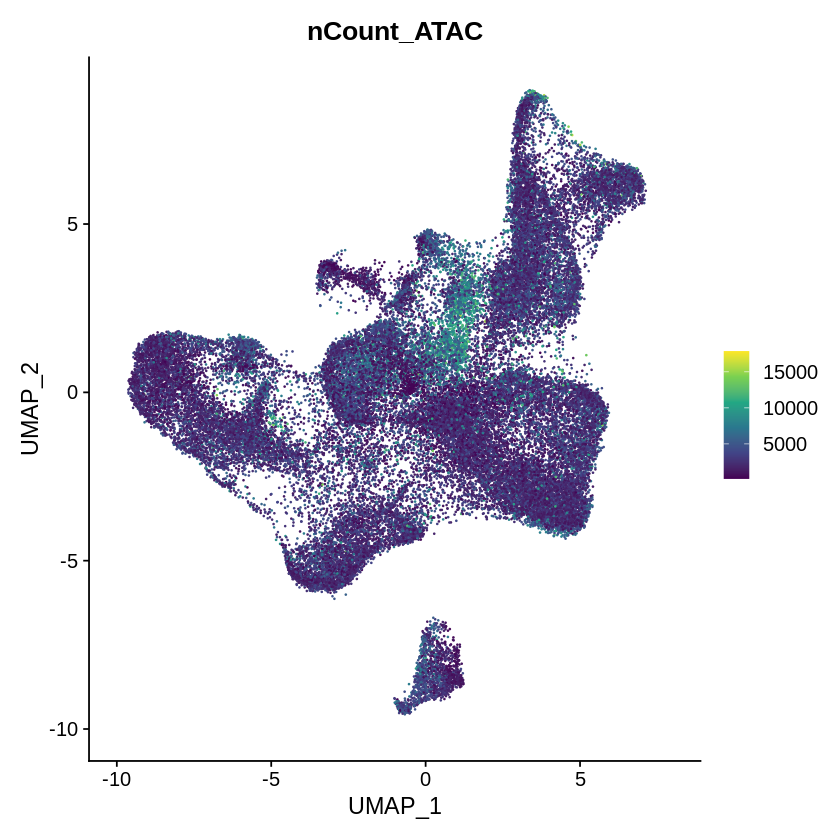

Saving 6.67 x 6.67 in image

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



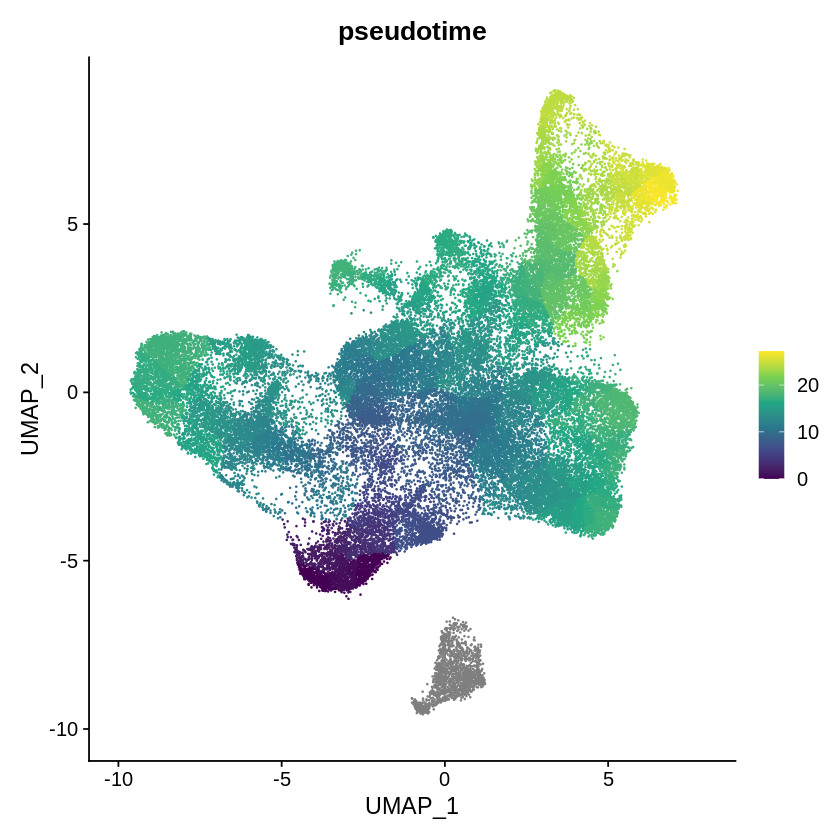

Saving 6.67 x 6.67 in image



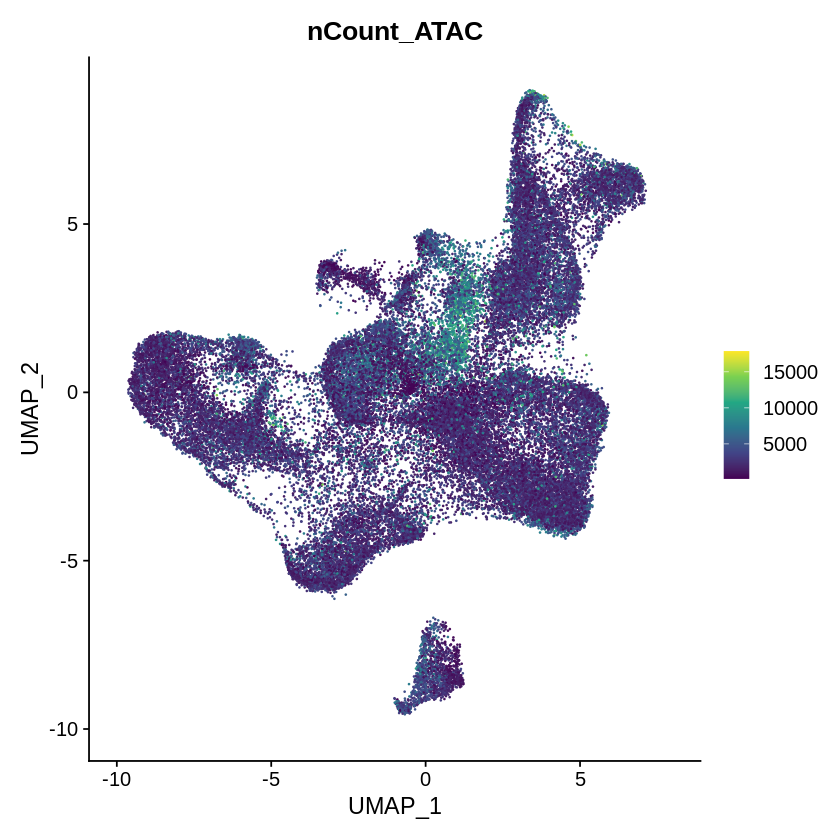

In [16]:


# order cells
# interactive more or not
if (order_f == ""){
   se.cds <- order_cells(se.cds, reduction_method = "UMAP", root_pr_nodes = c('Y_158','Y_154')) 
}else{
    se.cds <- order_cells(se.cds, reduction_method = "UMAP", root_cells = hsc)
}

# plot trajectories colored by pseudotime
plot_cells(
  cds = se.cds,
  color_cells_by = "pseudotime",
  show_trajectory_graph = TRUE
)
ggsave(file.path(outdir, "startBottom_SE.pseudotime.trajectory.png"))


se <- AddMetaData(
  object = se,
  metadata = se.cds@principal_graph_aux@listData$UMAP$pseudotime,
  col.name = "pseudotime"
)

FeaturePlot(se, c("pseudotime"), pt.size = 0.1) & scale_color_viridis_c()
ggsave(file.path(outdir, "startBottom_SE.pseudotime.png"))
FeaturePlot(se, c("nCount_ATAC"), pt.size = 0.1) & scale_color_viridis_c()
ggsave(file.path(outdir, "startBottom_SE.pseudotime.nCountPeaks.png"))



In [ ]:
#colData(se.cds)$cluster_labels <- se[["seurat_clusters"]]
#colData(se.cds)$cluster_labels

In [ ]:

#cds_subset = cluster_cells(cds_subset, resolution=1e-2)
#plot_cells(se.cds, color_cells_by="seurat_clusters")
#ggsave(file.path(outdir, "pseudo.clusters.png"))
#cds_subset = cluster_cells(cds_subset, resolution=1e-2)
# plot_cells(se.cds, color_cells_by="name")
# ggsave(file.path(outdir, "pseudo.clone.png"))

# #cds_subset = cluster_cells(cds_subset, resolution=1e-2)
# plot_cells(se.cds, color_cells_by="donor")
# ggsave(file.path(outdir, "pseudo.donor.png"))

plot_cells(se.cds, color_cells_by="seurat_clusters", label_cell_groups=TRUE)
#plot_cells(se.cds, color_cells_by="cluster_labels", label_cell_groups=TRUE)

In [ ]:
saveRDS(se, file.path(outdir, "SE.pseudotime.rds"))

saveRDS(se.cds, file.path(outdir, "SE.cds.rds"))

## Pseudotime DE
https://broadinstitute.github.io/2019_scWorkshop/functional-pseudotime-analysis.html

In [ ]:
if(to_de){
    de_res <- graph_test(se.cds, neighbor_graph = "principal_graph", cores = 16)
    write.table(de_res, file.path(outdir, "branch.de.atac.tsv"),quote = FALSE, sep="\t")
    de_res
}

In [ ]:
#de_res_rna <- graph_test(se.cds, neighbor_graph = "principal_graph", cores = 16)

In [ ]:
# de_res <- graph_test(se.cds, neighbor_graph = "principal_graph", cores = 3)

# genes_plt <- c("Ube2c", "Mrps12", "Hspa12a", "Igfbp3")
# plot_cells(se.cds, genes = genes_plt,
#            show_trajectory_graph = TRUE,
#            label_cell_groups = FALSE,
#            label_leaves = FALSE)